In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt


## Variables de prueba

Serie Original  SEV = S3-LCVER-CAZ

AB/2 de adquisicion = [2.0, 5.0, 10.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 92.0, 93.0, 95.0, 100.0] }

Rhoa adquiridos en campo = [1, 2.6, 13.6, 2.21, 2.26, 8.80, 7.46, 14.37, 36.49, 31.1, 4.67, 7.50, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.90, 27.48, 22.23, 30.99, 40.04]

Primera evaluación se realiza un pronostico de los intervalos no muestreados de Rhoa y integrados en las aparturas ab2, correspondiente a los valores 876, 87, 88, 97 y 98, evaluando el pronostoco para estos intervalos

In [ ]:
# datos correspondientes a SEV en Lampazos del naranjo, sitio no integrado en el entrenamiento
ab2_values = [     2,      3,     5,     8,    10,    10,    12,    15,    25,    30,    45,    55,    65,    75,    85,    95,   110,   130,   140,    150,    170,    190,    210,    220,    240,    260,    280,    300,    310,      320]
rhoa_data =  [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.40, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 0, 0, 0, 0, 17157.28]
rhoa_data_completo =  [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.40, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 116.13, 241.76, 402.26, 376.99, 122.61, 363.33, 147.65, 103.69, 17157.28]
ab2_data = ab2_values


rhoa_data_original =  [209.44, 138.23, 85.57, 44.38, 75.48, 79.79, 77.79, 63.47, 63.56, 53.01, 53.44, 50.28, 55.54, 47.15, 53.40, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 215.13, 162.54, 124.33, 116.13, 241.76, 402.26, 376.99, 122.61, 363.33, 147.65, 103.69, 17157.28]

# Random Forest

In [14]:

# Cargar modelo y columnas
model = joblib.load("random_forest_multioutput_v2.joblib")
X_cols = joblib.load("random_forest_feature_columns_v2.joblib")


Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 363.33, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 308.43837128269007, 241.76, 369.0299812984578, 376.99, 122.61, 363.33, 515.4544048065603, 551.2237394793867, 17157.28]


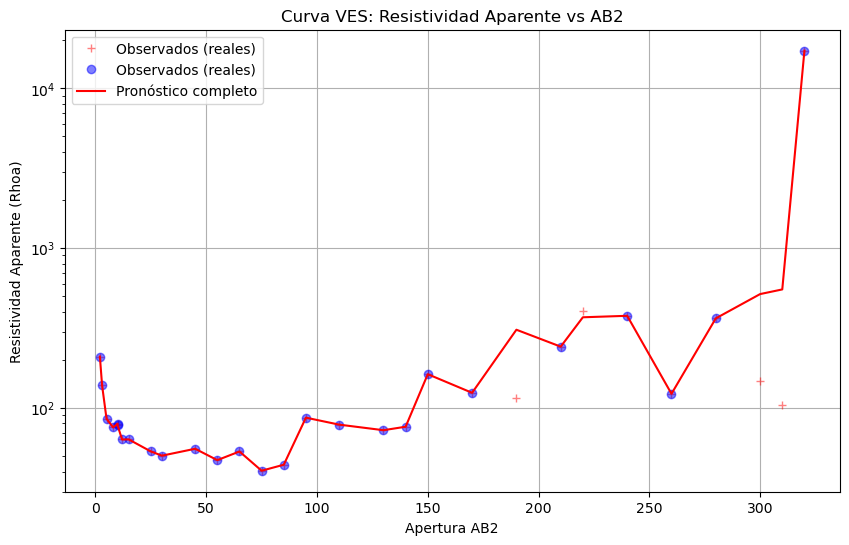

In [15]:
# Preparar DataFrame nuevo
df_new = pd.DataFrame(columns=X_cols)
for i in range(1, 31):
    df_new[f"AB2_{i}"] = [ab2_values[i-1]]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1]]
    df_new[f"is_observed_{i}"] = [1 if rhoa_data[i-1] != 0 else 0]

# Predicción
y_pred = model.predict(df_new)[0]  # Primer fila, array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data_completo, 'r+', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Machine v2

In [16]:
# Cargar el modelo (versión v2)
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols = joblib.load("svm_feature_columns_v2.joblib")

Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 363.33, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 1577.129871985115, 241.76, 1639.426164529312, 376.99, 122.61, 363.33, 1794.4716390115234, 1833.0513072138358, 17157.28]


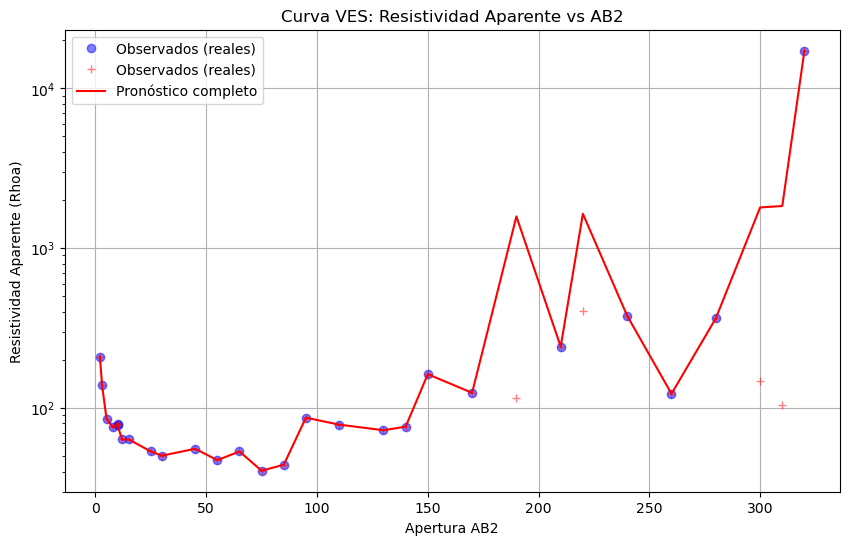

In [17]:
# Generar indicator_data automáticamente
indicator_data = [1.0 if rhoa > 0 else 0.0 for rhoa in rhoa_data]

# Crear DataFrame de entrada con nombres de columnas
X_new_data = ab2_values + rhoa_data + indicator_data
X_new_df = pd.DataFrame([X_new_data], columns=X_cols)

# Predicción
y_pred_new = svm_multi.predict(X_new_df)[0]  # Array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred_new[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_data_completo, 'r+', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.savefig('svm_rhoa_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Gradient Boosting Regressor (GBR) v2

In [18]:
# Cargar el modelo (versión v2)
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 363.33, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 280.09069881410835, 241.76, 179.5947843626745, 376.99, 122.61, 363.33, 434.6172001954099, 489.8763310722288, 17157.28]


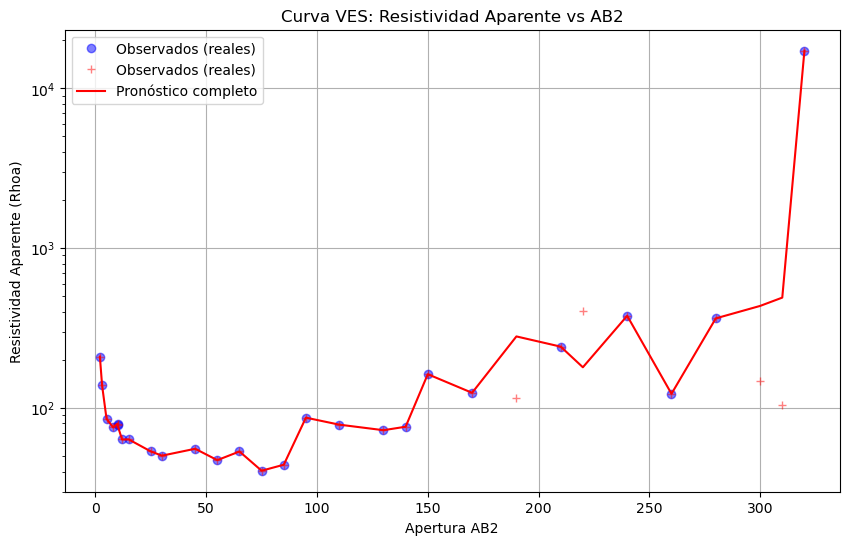

In [19]:
# Preparar DataFrame nuevo
df_new = pd.DataFrame(columns=X_cols)
for i in range(1, 31):
    df_new[f"AB2_{i}"] = [ab2_values[i-1]]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1]]
    df_new[f"is_observed_{i}"] = [1 if rhoa_data[i-1] != 0 else 0]

# Predicción
y_pred = gbr_multi.predict(df_new)[0]  # Primer fila, array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_data_completo, 'r+', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()

# Test 2



In [2]:
ab2_values = [2.0, 5.0, 10.0, 10.0, 15.0, 20.0, 25.0,  30.0,  35.0, 40.0, 40.0, 45.0,  50.0,  55.0,  60.0,  65.0,  70.0,  75.0, 80.0,  85.0,  90.0,  95.0, 100.0,  110.0, 120.0, 130.0,  135.0, 140.0, 145.0, 145.0]  # Completo, 30 valores
rhoa_data =  [  1, 2.6, 13.6, 2.21, 2.26, 8.80, 7.46, 14.37, 36.49, 31.1, 4.67, 7.50, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.90, 27.48, 22.23, 30.99, 40.04,     0,    0,    0,     0,    0,    0,     0]
ab2_data = ab2_values

## RF

In [3]:
# Cargar modelo y columnas
model = joblib.load("random_forest_multioutput_v2.joblib")
X_cols = joblib.load("random_forest_feature_columns_v2.joblib")


Rhoa observados: [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 0, 0, 0, 0, 0, 0, 0]
Rhoa predichos (completos): [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 35.354538813561994, 35.440805744823905, 33.99324577777468, 33.29889794941312, 33.21246796115321, 33.73128032173721, 37.468799341143146]


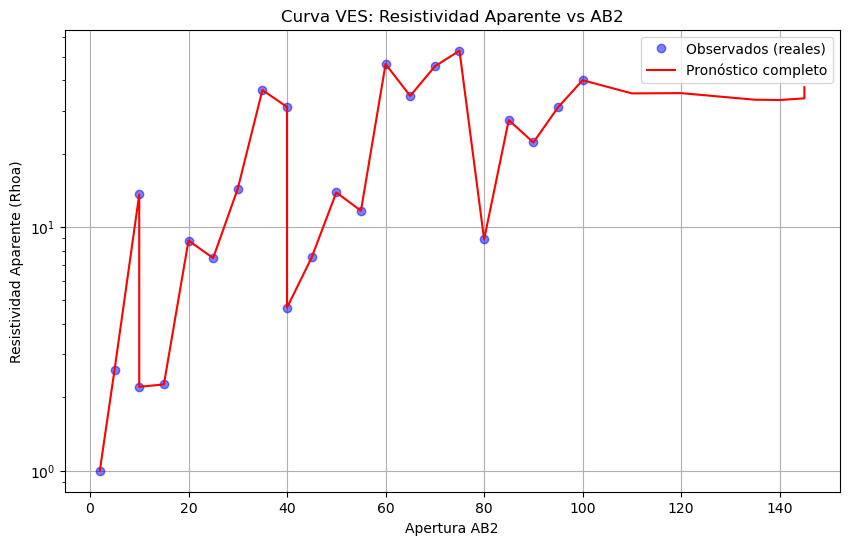

In [4]:
# Preparar DataFrame nuevo
df_new = pd.DataFrame(columns=X_cols)
for i in range(1, 31):
    df_new[f"AB2_{i}"] = [ab2_values[i-1]]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1]]
    df_new[f"is_observed_{i}"] = [1 if rhoa_data[i-1] != 0 else 0]

# Predicción
y_pred = model.predict(df_new)[0]  # Primer fila, array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()

# SVM

In [5]:
# Cargar el modelo (versión v2)
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols = joblib.load("svm_feature_columns_v2.joblib")

Rhoa observados: [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 0, 0, 0, 0, 0, 0, 0]
Rhoa predichos (completos): [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 21.34392545136575, 20.689231682609943, 20.141894578393476, 19.66256249404023, 19.588318575839594, 19.076224040007446, 19.216394417048605]


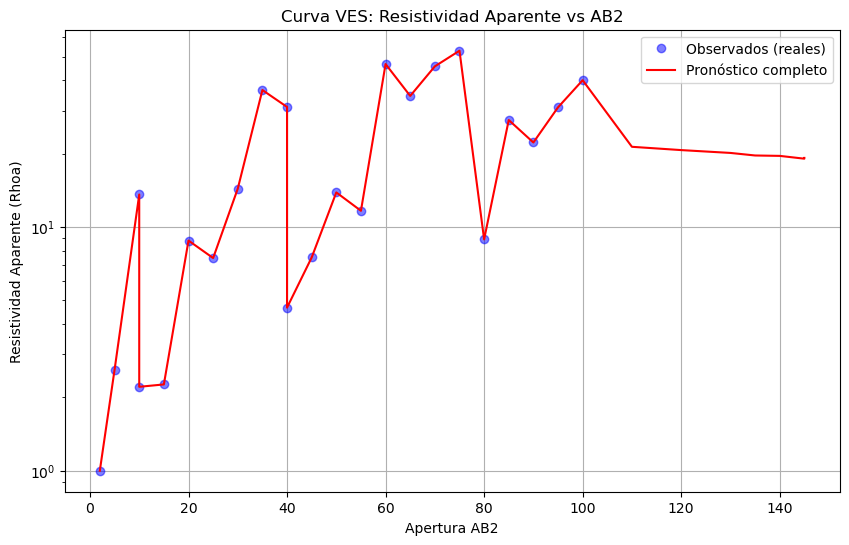

In [6]:
# Generar indicator_data automáticamente
indicator_data = [1.0 if rhoa > 0 else 0.0 for rhoa in rhoa_data]

# Crear DataFrame de entrada con nombres de columnas
X_new_data = ab2_values + rhoa_data + indicator_data
X_new_df = pd.DataFrame([X_new_data], columns=X_cols)

# Predicción
y_pred_new = svm_multi.predict(X_new_df)[0]  # Array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred_new[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.savefig('svm_rhoa_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## GRB

In [7]:
# Cargar el modelo (versión v2)
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 0, 0, 0, 0, 0, 0, 0]
Rhoa predichos (completos): [1, 2.6, 13.6, 2.21, 2.26, 8.8, 7.46, 14.37, 36.49, 31.1, 4.67, 7.5, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.9, 27.48, 22.23, 30.99, 40.04, 42.353300307950285, 39.69249370659825, 38.476587712804154, 49.45371803733324, 54.04462057596215, 55.05303994481004, 55.44535586110817]


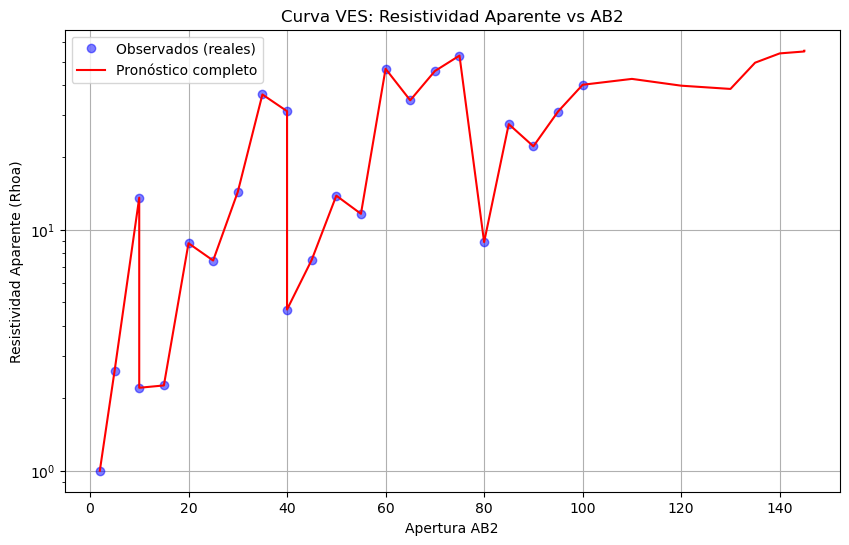

In [8]:
# Preparar DataFrame nuevo
df_new = pd.DataFrame(columns=X_cols)
for i in range(1, 31):
    df_new[f"AB2_{i}"] = [ab2_values[i-1]]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1]]
    df_new[f"is_observed_{i}"] = [1 if rhoa_data[i-1] != 0 else 0]

# Predicción
y_pred = gbr_multi.predict(df_new)[0]  # Primer fila, array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()

# Test 3

In [2]:
ab2_values =     [2.0, 5.0, 10.0, 10.0, 15.0, 20.0, 25.0,  30.0,  35.0, 40.0, 40.0, 45.0,  50.0,  55.0,  60.0,  65.0,  70.0,  75.0, 80.0,  85.0,  90.0,  95.0, 100.0]  # Completo, 30 valores
rhoa_data =      [  1, 2.6,    0, 2.21, 2.26, 8.80,    0, 14.37, 36.49, 31.1,    0, 7.50, 13.87,     0, 46.65, 34.52, 45.64,     0, 8.90, 27.48, 22.23, 30.99, 40.04]
rhoa_original =  [  1, 2.6, 13.6, 2.21, 2.26, 8.80, 7.46, 14.37, 36.49, 31.1, 4.67, 7.50, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.90, 27.48, 22.23, 30.99, 40.04]
ab2_data = ab2_values

## RF

In [21]:
# Cargar modelo y columnas
model = joblib.load("random_forest_multioutput_v2.joblib")
X_cols = joblib.load("random_forest_feature_columns_v2.joblib")


Rhoa observados: [195.3, 187.2, 0, 155.9, 141.9, 0, 107.8, 99.7, 0, 79.4, 76.5, 0, 65.2, 65.1, 0, 66.8, 68.2, 0, 74.8, 77.0]
Rhoa predichos (completos): [195.3, 187.2, 155.92873381280125, 155.9, 141.9, 129.7093858804161, 107.8, 99.7, 80.17298712418547, 79.4, 76.5, 60.34557223720491, 65.2, 65.1, 58.609055157856346, 66.8, 68.2, 62.72812543221837, 74.8, 77.0]


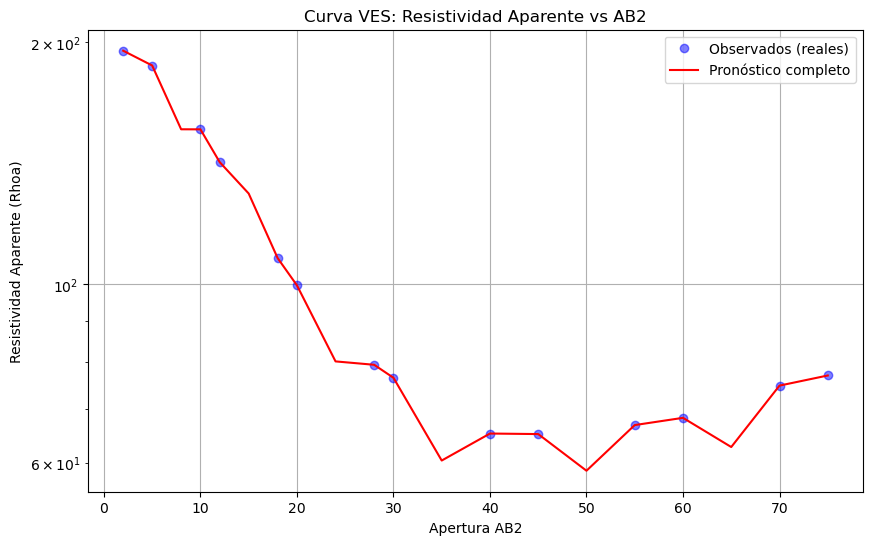

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# Cargar el modelo (ajusta según el modelo deseado, e.g., RF o GBR)
model = joblib.load("random_forest_multioutput_v2.joblib")  # Cambia según el modelo (e.g., gbr_multioutput_v2.joblib)
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  # Carga las columnas originales

# Datos manuales con cantidad variable (ejemplo con 20 puntos)
n_points = 20  # Número deseado de puntos (ajusta según necesites)
ab2_values = [2.0, 5.0, 8.0, 10.0, 12.0, 15.0, 18.0, 20.0, 24.0, 28.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0][:n_points]
rhoa_data = [195.3, 187.2, 0, 155.9, 141.9, 0, 107.8, 99.7, 0, 79.4, 76.5, 0, 65.2, 65.1, 0, 66.8, 68.2, 0, 74.8, 77.0][:n_points]  # Datos incompletos

# Generar columnas dinámicas basadas en n_points
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols

# Preparar DataFrame nuevo dinámicamente
df_new = pd.DataFrame(columns=X_cols_original)  # Usar las columnas originales del modelo
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]

# Rellenar columnas faltantes (de n_points + 1 a 30) con 0.0
for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]

# Predicción
y_pred = model.predict(df_new)[0]  # Primer fila, array de 30 valores predichos (se toman solo los primeros n_points)

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()

## VSM

In [ ]:
# Cargar el modelo (versión v2)
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols = joblib.load("svm_feature_columns_v2.joblib")

In [ ]:
# Generar indicator_data automáticamente
indicator_data = [1.0 if rhoa > 0 else 0.0 for rhoa in rhoa_data]

# Crear DataFrame de entrada con nombres de columnas
X_new_data = ab2_values + rhoa_data + indicator_data
X_new_df = pd.DataFrame([X_new_data], columns=X_cols)

# Predicción
y_pred_new = svm_multi.predict(X_new_df)[0]  # Array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred_new[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_original, 'r+', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.savefig('svm_rhoa_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## GRB

In [ ]:
# Cargar el modelo (versión v2)
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols = joblib.load("gbr_feature_columns_v2.joblib")

In [ ]:
# Preparar DataFrame nuevo
df_new = pd.DataFrame(columns=X_cols)
for i in range(1, 31):
    df_new[f"AB2_{i}"] = [ab2_values[i-1]]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1]]
    df_new[f"is_observed_{i}"] = [1 if rhoa_data[i-1] != 0 else 0]

# Predicción
y_pred = gbr_multi.predict(df_new)[0]  # Primer fila, array de 30 valores predichos

# Combinar observados y predichos (usa observados donde disponibles, predichos en faltantes)
rhoa_full = [rhoa_data[i] if rhoa_data[i] != 0 else y_pred[i] for i in range(30)]

# Imprimir resultados
print("Rhoa observados:", rhoa_data)
print("Rhoa predichos (completos):", rhoa_full)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ab2_values, rhoa_original, 'r+', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_data, 'bo', label='Observados (reales)', alpha=0.5)  # Puntos observados
plt.plot(ab2_values, rhoa_full, 'r-', label='Pronóstico completo')  # Curva predicha
plt.yscale('log')  # Eje Y logarítmico
plt.xscale('linear')  # Eje X lineal
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva VES: Resistividad Aparente vs AB2')
plt.legend()
plt.grid(True)
plt.show()